# Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, scale
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

# Dataset Processing

In [90]:
# data 불러오기
data = pd.read_csv('C:/Users/f4wed/Downloads/Boston.csv')
# 상위 5개 행을 출력해, 컬럼 구조 및 예시 값을 확인
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [91]:
# data set의 대략적인 특징 파악
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [92]:
# null값과 variable의 data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [93]:
# predictor와 response 설정
x = data.drop(['crim'], axis=1)
y = data['crim']

In [94]:
# 70% 학습, 30% 테스트로 분리 (seed 고정)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state=42)

# Multiple Lenear Regression

In [95]:
# 절편 추가
ols_sm = sm.OLS(y_train, sm.add_constant(x_train))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     19.07
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           4.98e-35
Time:                        18:29:22   Log-Likelihood:                -1148.8
No. Observations:                 354   AIC:                             2328.
Df Residuals:                     339   BIC:                             2386.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5873      8.202      2.022      0.044       0.453      32.721
Unnamed: 0    -0.0018      0.003     -0.527      0.599      -0.009       0.005
zn             0.0466      0.023      1.990      0.047       0.001       0.093
indus          0.0043      0.096      0.045      0.964      -0.184       0.192
chas          -1.0952      1.375     -0.797      0.426      -3.799       1.609
nox          -12.9334      6.281     -2.059      0.040     -25.287      -0.580
rm             0.5863      0.713      0.822      0.412      -0.816       1.989
age            0.0110      0.021      0.512      0.609      -0.031       0.053
dis           -1.0146      0.329     -3.083      0.002      -1.662      -0.367
rad            0.6222      0.108      5.778      0.000       0.410       0.834
tax           -0.0027      0.006     -0.439      0.661      -0.015       0.009
ptratio       -0.3243      0.211     -1.534      0.126      -0.740       0.092
black         -0.0007      0.004     -0.160      0.873      -0.009       0.008
lstat          0.0126      0.087      0.145      0.885      -0.159       0.184
medv          -0.2320      0.070     -3.302      0.001      -0.370      -0.094
==============================================================================
Omnibus:                      508.956   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80615.242
Skew:                           7.217   Prob(JB):                         0.00
Kurtosis:                      75.506   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# sklearn 선형회귀
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Predicted crim')

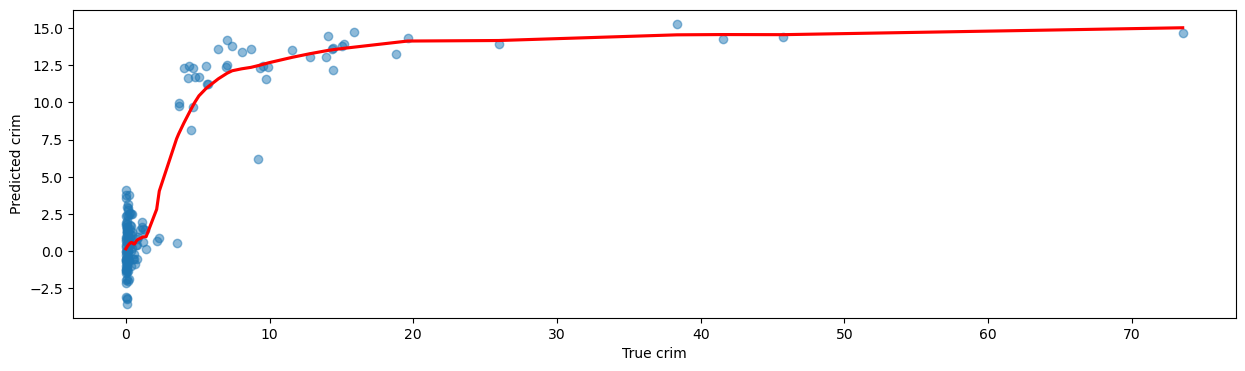

In [97]:
# 테스트셋에 대한 예측 vs. 실제값 산점도 + LOESS 추세선
fig = plt.figure(figsize=(15,4))
sns.regplot(x=y_test, y=lr.predict(x_test), 
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'},
            lowess=True)
plt.xlabel('True crim')
plt.ylabel('Predicted crim')

In [98]:
# MSE 계산
multi_MSE = mean_squared_error(y_test, lr.predict(x_test)) # y_true, y_pred error
multi_MSE

46.51239971277417

## Polynomial Regression (degree=2)

In [99]:
# 2차 다항 특성 생성
poly = PolynomialFeatures(2)
poly_fit = poly.fit_transform(data)

In [100]:
# DataFrame으로 변환, 상수항(1) 컬럼 제거
data_poly = pd.DataFrame(poly_fit, columns = poly.get_feature_names(data.columns))
data_poly = data_poly.drop(columns=['1'], axis=1)
data_poly

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,...,ptratio^2,ptratio black,ptratio lstat,ptratio medv,black^2,black lstat,black medv,lstat^2,lstat medv,medv^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,234.09,6072.570,76.194,367.20,157529.6100,1976.5620,9525.600,24.8004,119.520,576.00
1,2.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,316.84,7064.820,162.692,384.48,157529.6100,3627.6660,8573.040,83.5396,197.424,466.56
2,3.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,316.84,6992.374,71.734,617.66,154315.4089,1583.1049,13631.201,16.2409,139.841,1204.09
3,4.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,349.69,7379.581,54.978,624.58,155732.8369,1160.2122,13180.642,8.6436,98.196,1115.56
4,5.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,349.69,7422.030,99.671,676.94,157529.6100,2115.4770,14367.780,28.4089,192.946,1310.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,441.00,8231.790,203.070,470.40,153656.1601,3790.5433,8780.576,93.5089,216.608,501.76
502,503.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,441.00,8334.900,190.680,432.60,157529.6100,3603.8520,8176.140,82.4464,187.048,424.36
503,504.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,441.00,8334.900,118.440,501.90,157529.6100,2238.5160,9485.910,31.8096,134.796,571.21
504,505.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,441.00,8262.450,136.080,462.00,154802.9025,2549.5560,8655.900,41.9904,142.560,484.00


In [101]:
# 다항 특성 분리 및 학습/테스트 분할
x_poly = data_poly.drop(['crim'], axis=1)
y_poly = data_poly['crim']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y_poly, train_size = 0.8, test_size = 0.2, random_state=42)

In [102]:
# 2차 다항 LinearRegression 학습
lr.fit(x_train_poly, y_train_poly)

LinearRegression()

In [103]:
# OLS로 계수·유의성 다시 확인
ols_sm = sm.OLS(y_train_poly, sm.add_constant(x_train_poly))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.310e+05
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:29:31   Log-Likelihood:                 1129.6
No. Observations:                 404   AIC:                            -1991.
Df Residuals:                     270   BIC:                            -1455.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8826      0.808     -1.092      0.276      -2.474       0.709
Unnamed: 0             0.0012      0.001      1.738      0.083      -0.000       0.003
zn                     0.0018      0.004      0.447      0.655      -0.006       0.010
indus                  0.0193      0.018      1.064      0.288      -0.016       0.055
chas                  -0.0674      0.091     -0.744      0.457      -0.246       0.111
nox                    2.9895      1.210      2.470      0.014       0.606       5.373
rm                    -0.0648      0.087     -0.747      0.456      -0.235       0.106
age                   -0.0023      0.003     -0.886      0.376      -0.007       0.003
dis                   -0.0127      0.045     -0.282      0.778      -0.101       0.076
rad                    0.0157      0.024      0.645      0.520      -0.032       0.064
tax                   -0.0022      0.001     -1.541      0.125      -0.005       0.001
ptratio                0.0611      0.039      1.581      0.115      -0.015       0.137
black                 -0.0017      0.001     -2.385      0.018      -0.003      -0.000
lstat                  0.0450      0.011      4.029      0.000       0.023       0.067
medv                   0.0247      0.009      2.609      0.010       0.006       0.043
Unnamed: 0^2       -3.267e-07   2.08e-07     -1.570      0.118   -7.36e-07    8.29e-08
Unnamed: 0 crim     2.023e-05    1.4e-05      1.444      0.150   -7.35e-06    4.78e-05
Unnamed: 0 zn      -1.647e-07   1.02e-06     -0.162      0.871   -2.17e-06    1.84e-06
Unnamed: 0 indus   -1.102e-05   8.24e-06     -1.338      0.182   -2.72e-05     5.2e-06
Unnamed: 0 chas       -0.0009      0.001     -1.810      0.071      -0.002    8.28e-05
Unnamed: 0 nox         0.0008      0.001      1.219      0.224      -0.000       0.002
Unnamed: 0 rm        1.87e-05   6.16e-05      0.304      0.762      -0.000       0.000
Unnamed: 0 age     -7.835e-07   9.23e-07     -0.849      0.397    -2.6e-06    1.03e-06
Unnamed: 0 dis      -4.87e-06   1.62e-05     -0.301      0.764   -3.68e-05     2.7e-05
Unnamed: 0 rad     -1.237e-05   7.88e-06     -1.571      0.117   -2.79e-05    3.14e-06
Unnamed: 0 tax      3.848e-07   3.82e-07      1.008      0.314   -3.67e-07    1.14e-06
Unnamed: 0 ptratio -2.589e-05   1.14e-05     -2.276      0.024   -4.83e-05   -3.49e-06
Unnamed: 0 black    -2.37e-06   1.04e-06     -2.276      0.024   -4.42e-06    -3.2e-07
Unnamed: 0 lstat    5.115e-06    5.9e-06      0.867      0.387    -6.5e-06    1.67e-05
Unnamed: 0 medv    -3.085e-06    5.2e-06     -0.594      0.553   -1.33e-05    7.14e-06
crim^2              4.132e-06   1.32e-05      0.314      0.754   -2.18e-05       3e-05
crim zn                0.0034      0.002      2.092      0.037       0.000       0.007
crim indus            -0.0117      0.0

Text(0, 0.5, 'Predicted crim')

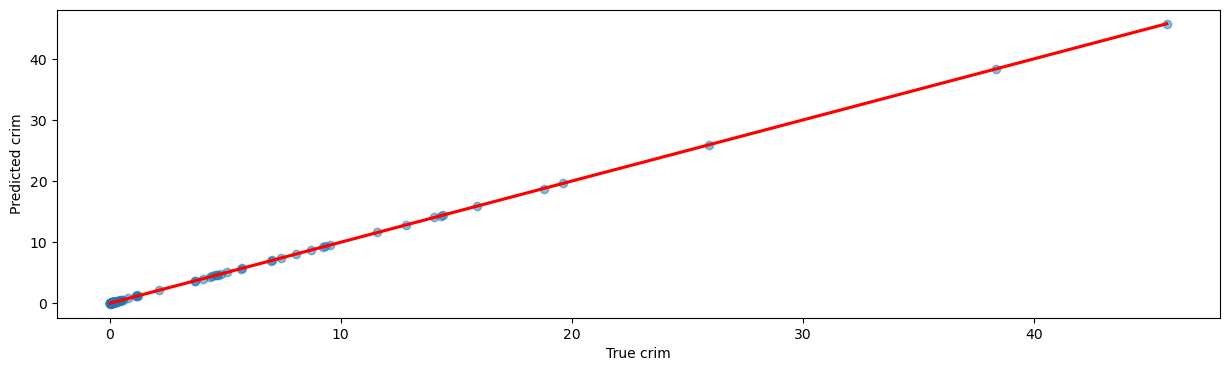

In [104]:
fig = plt.figure(figsize=(15,4))
sns.regplot(x=y_test_poly, y=lr.predict(x_test_poly), 
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'},
            lowess=True)
plt.xlabel('True crim')
plt.ylabel('Predicted crim')

In [105]:
poly_MSE = mean_squared_error(y_test_poly, lr.predict(x_test_poly)) # y_true, y_pred error
poly_MSE

0.0006924412780568615

## K-fold

In [106]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [107]:
kf_MSE_list = []
    
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    kf = LinearRegression(fit_intercept=True)
    kf.fit(x_train, y_train)
    kf_MSE = mean_squared_error(y_test,kf.predict(x_test))
    kf_MSE_list.append(kf_MSE)

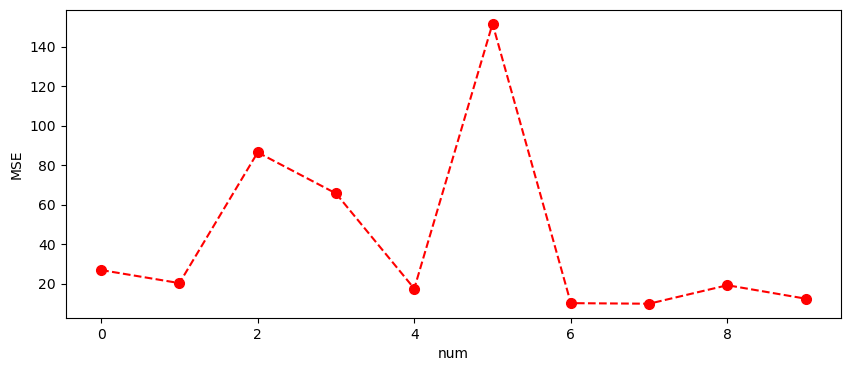

In [108]:
# Fold별 MSE 시각화
fig = plt.figure(figsize=(10,4))
plt.plot(kf_MSE_list, c = 'red', linestyle = '--', marker = 'o', markersize = 7)
plt.xlabel('num')
plt.ylabel('MSE')
plt.show()

In [109]:
# 평균 MSE
kf_MSE = np.mean(kf_MSE_list)
kf_MSE

41.942207279624775

## Lasso

In [110]:
# α 후보군(10¹ … 10⁻³) 생성
alpha = 10 ** np.linspace(1, -3, 100)

In [111]:
# 각 α별 Lasso 학습·MSE 계산
lasso_mse_list = []
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state=42)

for i in alpha:  
  lasso = Lasso(alpha = i)
  lasso.fit(x_train, y_train)
  lasso_MSE = mean_squared_error(y_test, lasso.predict(x_test))
  lasso_mse_list.append(lasso_MSE)

Text(0, 0.5, 'MSE')

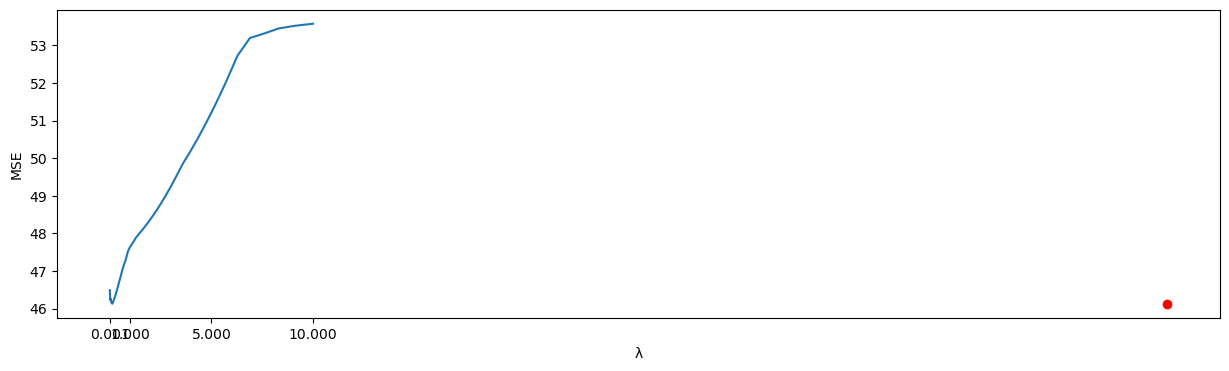

In [112]:
# α vs. MSE 그래프
m = min(lasso_mse_list)

fig = plt.figure(figsize=(15,4))
plt.plot(alpha, lasso_mse_list)
plt.plot(lasso_mse_list[::-1].index(m), m, 'or')
plt.xticks([10**(-3), 1, 5, 10])
plt.xlabel('λ')
plt.ylabel('MSE')

In [113]:
# LassoCV로 최적 α 자동 탐색
lasso_cv = LassoCV(alphas=alpha, normalize=True, max_iter=1000)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_

0.00210490414451202

In [114]:
# 최적 α로 Lasso 재학습·계수 확인
lasso = Lasso(alpha=lasso_cv.alpha_, normalize=True)
lasso_fit = lasso.fit(x_train, y_train)

pd.Series(lasso_fit.coef_, index = x.columns)

Unnamed: 0    -0.000986
zn             0.038224
indus         -0.003838
chas          -0.963858
nox          -10.179147
rm             0.433077
age            0.008278
dis           -0.864904
rad            0.557467
tax           -0.000000
ptratio       -0.263365
black         -0.000729
lstat          0.013374
medv          -0.204477
dtype: float64

In [115]:
# 최종 Lasso MSE
lasso_MSE = mean_squared_error(y_test,lasso_cv.predict(x_test))
lasso_MSE

46.70525693374678

## Compare MSE

In [116]:
x_axis = ['Multi Regression', 'Polynomial Regression', 'K-fold', 'Lasso']
y_axis = [multi_MSE, poly_MSE, kf_MSE, lasso_MSE]

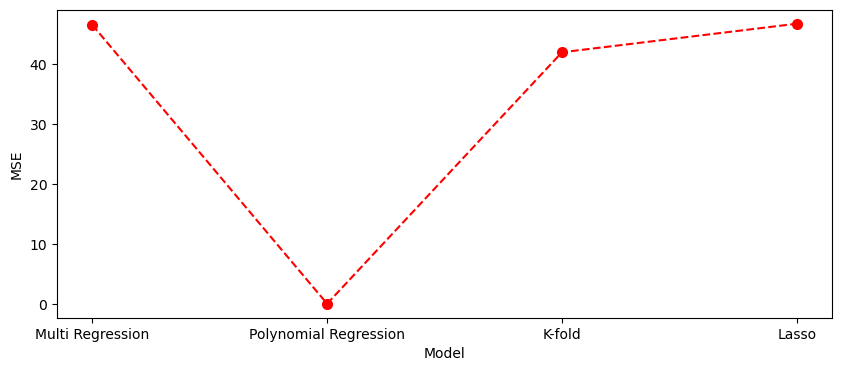

In [117]:
fig = plt.figure(figsize=(10,4))
plt.plot(x_axis, y_axis, c = 'red', linestyle = '--', marker = 'o', markersize = 7)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()